<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/DeThi/Cau1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Question 1: ANN**
* Use MELBOURNE_HOUSE_PRICE dataset (MELBOURNE_HOUSE_PRICES_LESS.csv) to precdict house prices from other features.
* Read more: https://www.kaggle.com/anthonypino/melbourne-housing-market/data ### Requirement:
* Apply ANN to build a model that predicts house prices from the provided features.
* Make new predictions for samples that have no prices in the dataset.

In [92]:
# Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/MELBOURNE_HOUSE_PRICES_LESS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [94]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [95]:
#Xoa null price
df.dropna(inplace=True)

In [96]:
#create a dataframe with all training data except the target column
train_X = df.drop(columns=['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Regionname', 'Price'])
#check that the target variable has been removed
train_X.head()

,Rooms,Type,Postcode,Propertycount,Distance,CouncilArea
0,3,h,3067,4019,3.0,Yarra City Council
1,3,h,3067,4019,3.0,Yarra City Council
2,3,h,3067,4019,3.0,Yarra City Council
3,3,h,3040,1543,7.5,Moonee Valley City Council
4,2,h,3042,3464,10.4,Moonee Valley City Council


In [97]:
train_X.shape

(48433, 6)

In [98]:
#create a dataframe with only the target column
train_y = df[['Price']]
#view dataframe
train_y.head()

,Price
0,1490000.0
1,1220000.0
2,1420000.0
3,1515000.0
4,670000.0


In [99]:
#get number of columns in training data
n_cols = train_X.shape[1]
n_cols

6

In [100]:
X = train_X[:].values
y = train_y[:].values

In [101]:
X[:10]

array([[3, 'h', 3067, 4019, 3.0, 'Yarra City Council'],
       [3, 'h', 3067, 4019, 3.0, 'Yarra City Council'],
       [3, 'h', 3067, 4019, 3.0, 'Yarra City Council'],
       [3, 'h', 3040, 1543, 7.5, 'Moonee Valley City Council'],
       [2, 'h', 3042, 3464, 10.4, 'Moonee Valley City Council'],
       [2, 't', 3042, 3464, 10.4, 'Moonee Valley City Council'],
       [2, 'u', 3042, 3464, 10.4, 'Moonee Valley City Council'],
       [3, 'h', 3042, 3464, 10.4, 'Moonee Valley City Council'],
       [3, 'h', 3206, 3280, 3.0, 'Port Phillip City Council'],
       [3, 'u', 3020, 2185, 10.5, 'Brimbank City Council']], dtype=object)

In [102]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 5] = labelencoder_X_2.fit_transform(X[:, 5])

X[:10]

array([[3, 0, 3067, 4019, 3.0, 32],
       [3, 0, 3067, 4019, 3.0, 32],
       [3, 0, 3067, 4019, 3.0, 32],
       [3, 0, 3040, 1543, 7.5, 22],
       [2, 0, 3042, 3464, 10.4, 22],
       [2, 1, 3042, 3464, 10.4, 22],
       [2, 2, 3042, 3464, 10.4, 22],
       [3, 0, 3042, 3464, 10.4, 22],
       [3, 0, 3206, 3280, 3.0, 27],
       [3, 2, 3020, 2185, 10.5, 3]], dtype=object)

In [103]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])],
 remainder='passthrough')
X = ct.fit_transform(X.tolist())

X = X[:, 1:]
X[:10]

array([[0.0, 0.0, 3, 3067, 4019, 3.0, 32],
       [0.0, 0.0, 3, 3067, 4019, 3.0, 32],
       [0.0, 0.0, 3, 3067, 4019, 3.0, 32],
       [0.0, 0.0, 3, 3040, 1543, 7.5, 22],
       [0.0, 0.0, 2, 3042, 3464, 10.4, 22],
       [1.0, 0.0, 2, 3042, 3464, 10.4, 22],
       [0.0, 1.0, 2, 3042, 3464, 10.4, 22],
       [0.0, 0.0, 3, 3042, 3464, 10.4, 22],
       [0.0, 0.0, 3, 3206, 3280, 3.0, 27],
       [0.0, 1.0, 3, 3020, 2185, 10.5, 3]], dtype=object)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [105]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [106]:
X_train[:10]

array([[-0.33853595, -0.48723518, -0.07586129, -0.88590061, -0.82860707,
        -0.83480801,  0.19427816],
       [-0.33853595,  2.05239694, -0.07586129,  0.51611398, -0.4739128 ,
         0.14533065, -1.28658043],
       [-0.33853595, -0.48723518,  0.98267796,  0.51611398, -0.4739128 ,
         0.14533065, -1.28658043],
       [-0.33853595, -0.48723518, -0.07586129, -0.41590708,  0.29246014,
        -0.75533731, -0.7929609 ],
       [-0.33853595, -0.48723518, -0.07586129, -0.35217915, -0.45259974,
        -0.64937637, -1.38530434],
       [-0.33853595, -0.48723518,  0.98267796,  0.1974743 , -0.89389236,
        -0.1328168 ,  0.68789769],
       [-0.33853595, -0.48723518,  0.98267796,  0.51611398, -1.16894307,
         0.14533065, -1.28658043],
       [-0.33853595,  2.05239694, -1.13440054,  0.65950183, -1.24454836,
        -1.28514199,  1.28024113],
       [-0.33853595, -0.48723518, -0.07586129, -0.7903087 , -0.51698763,
         1.92017635,  1.67513676],
       [-0.33853595,  2.0523

**Xây dựng model ANN**

units = (7 + 1) / 2 = 4

Nhưng mà 4 hơi nhỏ, dùng 4 thì ít param nên dùng 7 luôn

In [107]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential


In [108]:
model = Sequential()
model.add(Dense(units = 7, activation='relu', input_shape=(7,)))
model.add(Dropout(rate=0.1))
model.add(Dense(units = 4, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1))

In [109]:
model.compile(optimizer='adam', loss='mse')

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 32        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
606/606 [==============================] - 3s 4ms/step - loss: 1343290998784.0000 - val_loss: 1366861152256.0000
Epoch 2/100
606/606 [==============================] - 2s 4ms/step - loss: 1342968692736.0000 - val_loss: 1366184558592.0000
Epoch 3/100
606/606 [==============================] - 2s 3ms/step - loss: 1341829545984.0000 - val_loss: 1364518633472.0000
Epoch 4/100
606/606 [==============================] - 2s 4ms/step - loss: 1339420180480.0000 - val_loss: 1361234886656.0000
Epoch 5/100
606/606 [==============================] - 2s 3ms/step - loss: 1335311728640.0000 - val_loss: 1356248121344.0000
Epoch 6/100
606/606 [==============================] - 2s 4ms/step - loss: 1329527783424.0000 - val_loss: 1349466980352.0000
Epoch 7/100
606/606 [==============================] - 2s 4ms/step - loss: 1321837264896.0000 - val_loss: 1340769173504.0000
Epoch 8/100
606/606 [==============================] - 2s 3ms/step - loss: 1312327073792.0000 - val_loss: 1330103844864.0000


In [112]:
history

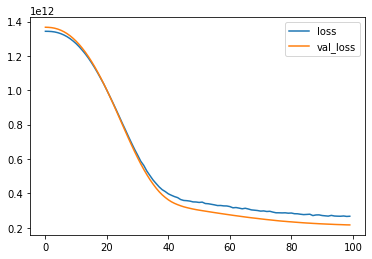

In [113]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

## Thử predict giá trị mới


In [154]:
test_data = np.array([[3, 'h',13067, 5019, 3.0, 'Yarra City Council']])
test_data[:, 1] = labelencoder_X_1.transform(test_data[:, 1])
test_data[:, 5] = labelencoder_X_2.transform(test_data[:, 5])
np.array(test_data, np.float)

array([[3.0000e+00, 0.0000e+00, 1.3067e+04, 5.0190e+03, 3.0000e+00,
        3.2000e+01]])

In [155]:
test_data = ct.transform([[3.0000e+00, 0.0000e+00, 1.3067e+04, 5.0190e+03, 3.0000e+00,
        3.2000e+01]])

In [156]:
test_data = test_data[:, 1:]
test_data = sc.transform(test_data)

In [157]:
test_data

array([[-3.38535946e-01, -4.87235184e-01, -7.58612874e-02,
         7.92121484e+01, -5.71504206e-01, -1.28514199e+00,
         1.77386066e+00]])

In [158]:
predicted_value = model.predict(test_data)
predicted_value

array([[15475678.]], dtype=float32)

In [160]:
#Save the result
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model.h5'
model.save('Cau1_model.h5')